In [2]:
#classifying emails
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline  
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [4]:
df=pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
df.isnull()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum

<bound method DataFrame.sum of       Email No.    the     to    ect    and    for     of      a    you  \
0         False  False  False  False  False  False  False  False  False   
1         False  False  False  False  False  False  False  False  False   
2         False  False  False  False  False  False  False  False  False   
3         False  False  False  False  False  False  False  False  False   
4         False  False  False  False  False  False  False  False  False   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
5167      False  False  False  False  False  False  False  False  False   
5168      False  False  False  False  False  False  False  False  False   
5169      False  False  False  False  False  False  False  False  False   
5170      False  False  False  False  False  False  False  False  False   
5171      False  False  False  False  False  False  False  False  False   

        hou  ...  connevey    jay  valued    lay  infrastructure  mi

In [7]:
df.shape

(5172, 3002)

In [8]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [10]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']
x.shape

(5172, 3000)

In [11]:
y.shape

(5172,)

In [12]:
x.info
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [13]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

<Axes: xlabel='Prediction', ylabel='count'>

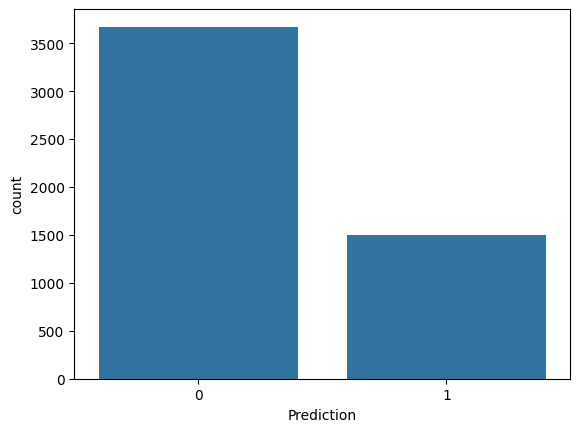

In [14]:
sns.countplot(x=y)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(x)

In [16]:
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]], shape=(5172, 3000))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [18]:
X_scaled.shape

(5172, 3000)

In [19]:
X_train.shape

(3879, 3000)

In [20]:
X_test.shape

(1293, 3000)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

In [25]:
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [26]:
y_pred = knn.predict(X_test)

In [43]:
print("Prediction", y_pred)  # Display the predicted values
print("KNN accuracy = ", accuracy_score(y_test, y_pred))  # Calculate and display the accuracy of the KNN model
print("Confusion matrix", metrics.confusion_matrix(y_test, y_pred))

Prediction [0 0 1 ... 0 0 0]
KNN accuracy =  0.7548337200309359
Confusion matrix [[892  21]
 [296  84]]


In [28]:
##import the evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

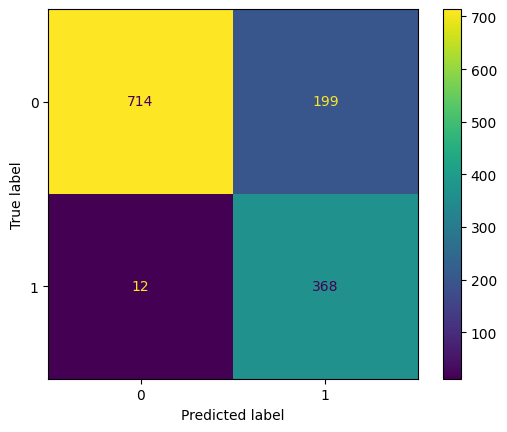

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [30]:
y_test.value_counts()

Prediction
0    913
1    380
Name: count, dtype: int64

In [36]:
accuracy_score(y_test, y_pred)

0.8561484918793504

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       913
           1       0.76      0.74      0.75       380

    accuracy                           0.86      1293
   macro avg       0.83      0.82      0.83      1293
weighted avg       0.86      0.86      0.86      1293



In [32]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(X_train, y_train)

,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
# predict
y_pred = svm.predict(X_test)
print("SVM accuracy = ",accuracy_score(y_test,y_pred))

SVM accuracy =  0.8561484918793504


In [37]:
svm=SVC(kernel='linear')
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [38]:
y_pred = svm.predict(X_test)
print("SVM accuracy = ",accuracy_score(y_test,y_pred))

SVM accuracy =  0.9659706109822119


In [39]:
svm=SVC(kernel='rbf')
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [40]:
y_pred = svm.predict(X_test)
print("SVM accuracy = ",accuracy_score(y_test,y_pred))

SVM accuracy =  0.9505027068832174


In [41]:
svm=SVC(kernel='poly')
svm.fit(X_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [42]:
y_pred = svm.predict(X_test)
print("SVM accuracy = ",accuracy_score(y_test,y_pred))

SVM accuracy =  0.7548337200309359
